In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df= pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   numeric  3 non-null      int64 
 1   text     3 non-null      object
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes
None


In [24]:
print("First few rows of the dataset:\n",df.head())
print("\nSummary statistics of the dataset:\n",df.describe())

First few rows of the dataset:
    numeric text
0        1    a
1        2    b
2        3    c

Summary statistics of the dataset:
        numeric
count      3.0
mean       2.0
std        1.0
min        1.0
25%        1.5
50%        2.0
75%        2.5
max        3.0


In [25]:
#Handling missing values
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [26]:
print("\nSummary statistics after imputation:\n", df_imputed.describe())


Summary statistics after imputation:
         numeric text
count         3    3
unique        3    3
top           1    a
freq          1    1


In [27]:
df = pd.DataFrame({'numeric': [1, 2, 3], 'text': ['a', 'b', 'c']})

# Handling missing values (if necessary)
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Select only numeric columns for scaling
numeric_cols = df_imputed.select_dtypes(include=['number']).columns

# Check if there are any numeric columns
if len(numeric_cols) > 0:
    # Feature Scaling using StandardScaler on numeric columns only
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed[numeric_cols]), columns=df_numeric)

    # Concatenate scaled numeric columns with non-numeric columns
    df_scaled = pd.concat([df_scaled, df_imputed.drop(columns=numeric_cols)], axis=1)

    print("\nSummary statistics after feature scaling:\n", df_scaled.describe())

else:
    print("\nNo numeric columns found for scaling.")


No numeric columns found for scaling.


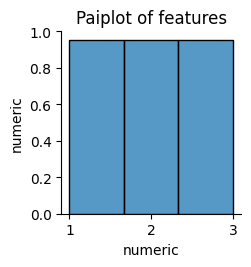

In [28]:
#EDA
#pairplot

sns.pairplot(df)
plt.title("Paiplot of features")
plt.show()

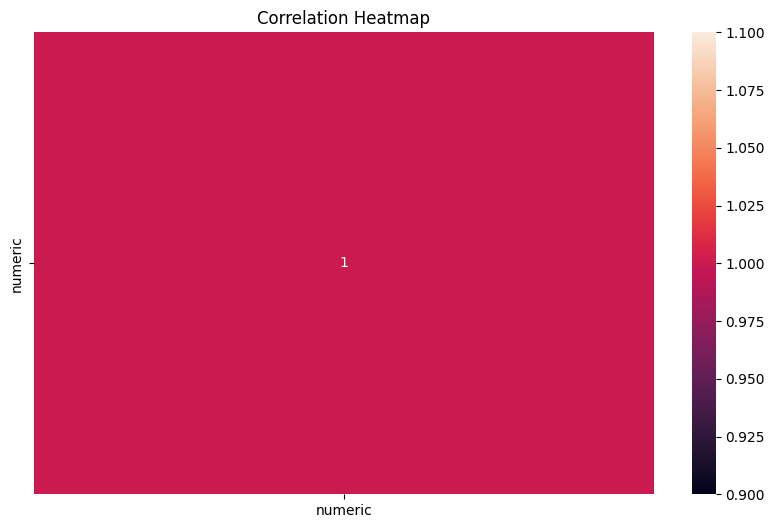

In [29]:
#heatmap
plt.figure(figsize = (10,6))

numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot = True)

plt.title("Correlation Heatmap")
plt.show()

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
K = range(1, len(numeric_df) +1) # Change the range of K to be from 1 to the number of samples in numeric_df
for k in K:
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans.fit(numeric_df)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


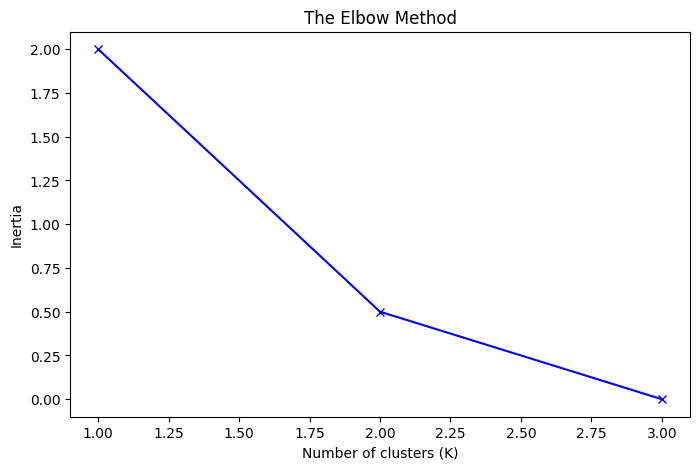

In [31]:
plt.figure(figsize = (8,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

In [32]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(numeric_df)
numeric_df['cluster'] = y_kmeans
numeric_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,numeric,cluster
0,1,2
1,2,0
2,3,1


In [33]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42) # Ensure that at least 2 clusters are formed and that there are at least 2 data points per cluster
y_kmeans = kmeans.fit_predict(numeric_df)
silhouette_kmeans = silhouette_score(numeric_df, y_kmeans)
print(f'Silhouette Score for K-Means: , {silhouette_kmeans}')

Silhouette Score for K-Means: , 0.24502964531088275


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


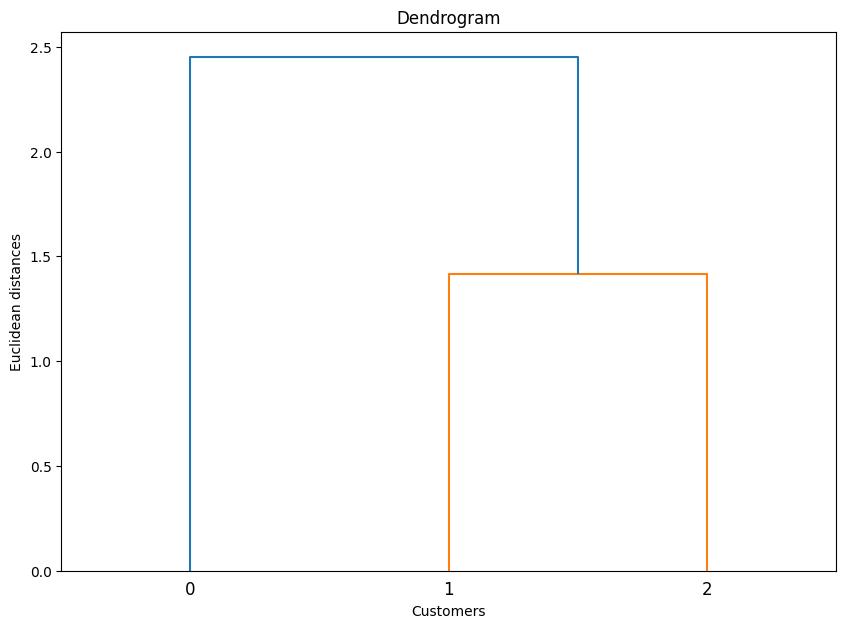

In [34]:
#hierarchical clustering

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

z = linkage(numeric_df, method = 'ward')
plt.figure(figsize = (10,7))
dendrogram(z)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [35]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(numeric_df)
numeric_df['cluster'] = y_hc
numeric_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,numeric,cluster
0,1,1
1,2,2
2,3,0


In [36]:
# Check the unique values in the cluster assignments
print(numeric_df['cluster'].unique())

# If there are less than 4 unique values, adjust the number of clusters in AgglomerativeClustering
if len(numeric_df['cluster'].unique()) < 4:
  hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward') # Set number of clusters to 2
  y_hc = hc.fit_predict(numeric_df)
  numeric_df['cluster'] = y_hc

# Recalculate the silhouette score
silhouette_hc = silhouette_score(numeric_df, y_hc)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hc}')

[1 2 0]
Silhouette Score for Hierarchical Clustering: 0.2818932077711649


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [37]:
from sklearn.cluster import DBSCAN

# DBSCAN implementation
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(numeric_df)

# Check the number of unique clusters
n_clusters = len(set(clusters_dbscan))

# Calculate Silhouette score only if more than one cluster is found
if n_clusters > 1:
  # Silhouette score for DBSCAN
  silhouette_dbscan = silhouette_score(numeric_df, clusters_dbscan)
  print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')
else:
  print("DBSCAN found only one cluster. Silhouette score cannot be calculated.")

DBSCAN found only one cluster. Silhouette score cannot be calculated.


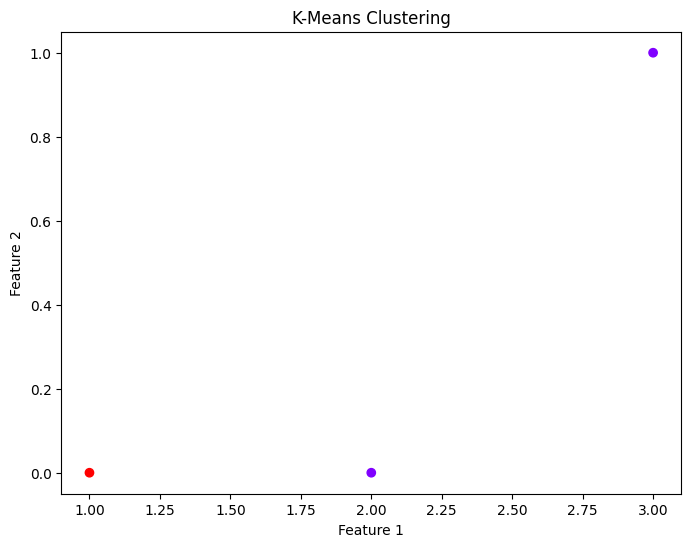

In [38]:
#K-means cluster visualation

plt.figure(figsize=(8,6))
plt.scatter(numeric_df.iloc[:,0], numeric_df.iloc[:,1], c = y_kmeans, cmap = 'rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

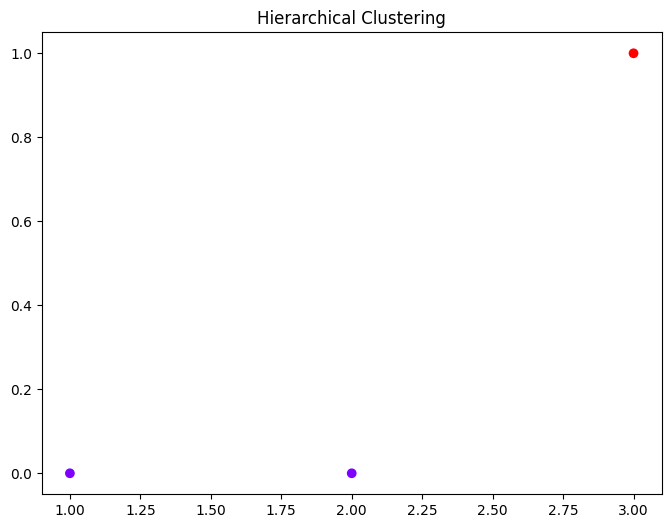

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(numeric_df.iloc[:, 0], numeric_df.iloc[:, 1], c=y_hc, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.show()

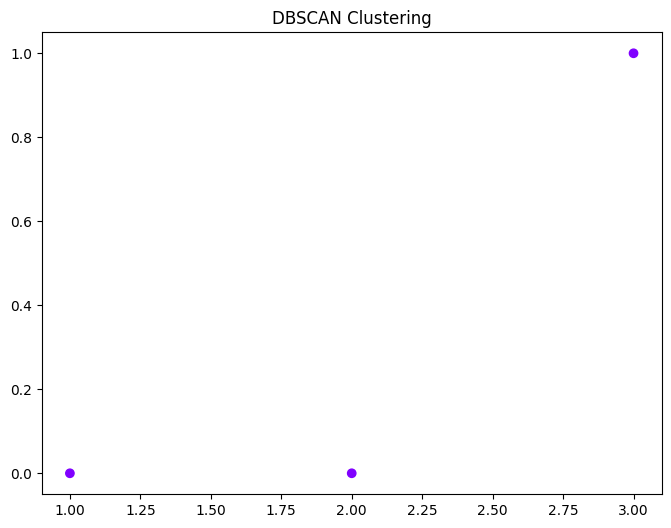

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(numeric_df.iloc[:, 0], numeric_df.iloc[:, 1], c=clusters_dbscan, cmap='rainbow') # Changed m_dbscan to clusters_dbscan
plt.title('DBSCAN Clustering')
plt.show()

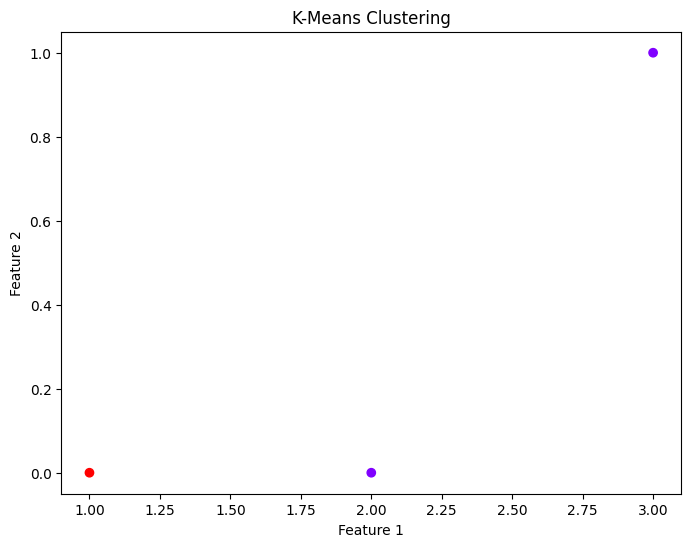

K-Means Centroids: 
[[2.5 0.5]
 [1.  2. ]]

K-Means Cluster 0 Summary:

        numeric   cluster  KMeans_Cluster
count  2.000000  2.000000             2.0
mean   2.500000  0.500000             0.0
std    0.707107  0.707107             0.0
min    2.000000  0.000000             0.0
25%    2.250000  0.250000             0.0
50%    2.500000  0.500000             0.0
75%    2.750000  0.750000             0.0
max    3.000000  1.000000             0.0

K-Means Cluster 1 Summary:

       numeric  cluster  KMeans_Cluster
count      1.0      1.0             1.0
mean       1.0      0.0             1.0
std        NaN      NaN             NaN
min        1.0      0.0             1.0
25%        1.0      0.0             1.0
50%        1.0      0.0             1.0
75%        1.0      0.0             1.0
max        1.0      0.0             1.0

K-Means Cluster 2 Summary:

       numeric  cluster  KMeans_Cluster
count      0.0      0.0             0.0
mean       NaN      NaN             NaN
std        N

In [44]:
#K-means cluster visualation

plt.figure(figsize=(8,6))
plt.scatter(numeric_df.iloc[:,0], numeric_df.iloc[:,1], c = y_kmeans, cmap = 'rainbow')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

centroids_kmeans = kmeans.cluster_centers_
print(f"K-Means Centroids: \n{centroids_kmeans}")

# Add the cluster assignments to the DataFrame
numeric_df['KMeans_Cluster'] = kmeans.labels_

# Analyze data points in each K-Means cluster
for cluster in range(3):
    print(f"\nK-Means Cluster {cluster} Summary:\n")
    # Use numeric_df instead of df_scaled
    print(numeric_df[numeric_df['KMeans_Cluster'] == cluster].describe())

In [40]:
print(f'Silhouette Score Comparison:')
print(f'K-Means: {silhouette_kmeans}')
print(f'Hierarchical Clustering: {silhouette_hc}')

print(f'DBSCAN: {clusters_dbscan}')

Silhouette Score Comparison:
K-Means: 0.24502964531088275
Hierarchical Clustering: 0.2818932077711649
DBSCAN: [-1 -1 -1]
